In [1]:
from urllib import request

In [3]:
response = request.urlopen('https://movie.douban.com/cinema/nowplaying/shanghai/')
html_data = response.read().decode('utf-8')

In [5]:
print(html_data)

<!DOCTYPE html>
<html lang="zh-cmn-Hans" class="">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <title>
    上海 - 在线购票&amp;影讯
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    
    <meta name="keywords" content="上海,在线购票,网上电影票预订,优惠电影票,影讯,排片,放映时间,电影票价"/>
    <meta name="description" content="上海电影院在线优惠购票及影讯排片查询"/>

    <link rel="apple-touch-icon" href="/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/420c6a4b676c73bc6af48dfcdd18b662f5c223d7/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22d3284848/css/separation/_all.css" rel="stylesheet" type="text/css">
    <link href="https://img3.do

In [7]:
from bs4 import BeautifulSoup as bs

In [8]:
soup = bs(html_data, 'html.parser')    
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')

In [9]:
print(nowplaying_movie_list[0])

<li class="list-item" data-actors="张译 / 黄景瑜 / 海清" data-category="nowplaying" data-director="林超贤" data-duration="138分钟" data-enough="True" data-region="中国大陆 香港" data-release="2018" data-score="8.5" data-showed="True" data-star="45" data-subject="26861685" data-title="红海行动" data-votecount="252295" id="26861685">
<ul class="">
<li class="poster">
<a class="ticket-btn" data-psource="poster" href="https://movie.douban.com/subject/26861685/?from=playing_poster" target="_blank">
<img alt="红海行动" class="" rel="nofollow" src="https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2514175916.jpg"/>
</a>
</li>
<li class="stitle">
<a class="ticket-btn" data-psource="title" href="https://movie.douban.com/subject/26861685/?from=playing_poster" target="_blank" title="红海行动">
                                    红海行动
                                </a>
</li>
<li class="srating">
<span class="rating-star allstar45"></span>
<span class="subject-rate">8.5</span>
</li>
<li class="sbtn">
<a class="ticke

In [10]:
nowplaying_list = []
for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']      
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict)

In [11]:
print(nowplaying_list)

[{'name': '红海行动', 'id': '26861685'}, {'name': '翻滚吧姐妹', 'id': '26898855'}, {'name': '唐人街探案2', 'id': '26698897'}, {'name': '捉妖记2', 'id': '26575103'}, {'name': '西游记女儿国', 'id': '25829175'}, {'name': '祖宗十九代', 'id': '27114417'}, {'name': '熊出没·变形记', 'id': '27176717'}, {'name': '爱在记忆消逝前', 'id': '3036465'}, {'name': '妈妈咪鸭', 'id': '26603666'}, {'name': '马戏之王', 'id': '3914513'}, {'name': '小马宝莉大电影', 'id': '26176481'}, {'name': '人怕出名猪怕壮', 'id': '27622779'}, {'name': '无问西东', 'id': '6874741'}, {'name': '奇迹男孩', 'id': '26787574'}, {'name': '南极之恋', 'id': '26628329'}, {'name': '忌日快乐', 'id': '27027913'}, {'name': '公牛历险记', 'id': '25846857'}, {'name': '闺蜜2', 'id': '25856453'}, {'name': '浪矢解忧杂货店', 'id': '26742730'}, {'name': '坏爸爸', 'id': '26986005'}, {'name': '金龟子', 'id': '27605297'}, {'name': '泡芙小姐', 'id': '26944076'}, {'name': '奔', 'id': '26865342'}, {'name': '小萝莉的猴神大叔', 'id': '26393561'}, {'name': '莫斯科陷落', 'id': '26796845'}, {'name': '太空救援', 'id': '27073291'}]


In [12]:
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[0]['id'] + '/comments' +'?' +'start=0' + '&limit=20'
resp = request.urlopen(requrl)
html_data = resp.read().decode('utf-8')
soup = bs(html_data, 'html.parser')
comment_div_lits = soup.find_all('div', class_='comment')

In [13]:
eachCommentList = [];
for item in comment_div_lits:
        if item.find_all('p')[0].string is not None:    
            eachCommentList.append(item.find_all('p')[0].string)

In [14]:
print(eachCommentList)

[' 本来对这类电影不感兴趣，陪着男朋友去看的，很意外，还不错，一部很燃的片子，俩个多小时的电影，至少一个半小时的高潮，全程无尿点，据说是根据真实事件改编的，海陆空作战，超级帅。算是春节档电影的一股清流，大家真的要感受一下中国军人的风采，只想说威武！！佟莉炸飞机还有狙击手对战那段太帅了\n        ', ' 春节档最好！最好不是战狼而是战争，有点类似黑鹰坠落，主旋律色彩下，真实又残酷的战争渲染。故事性不强，文戏不超20分钟，从头打到尾，林超贤场面调度极佳，巷战、偷袭、突击有条不紊，军械武器展示效果不错。尺度超大，钢锯岭式血肉横飞，还给你看特写！敌人如丧尸一般打不完，双方的狙击手都是亮点\n        ', ' 国产类型片的里程碑，2个多小时节奏全程紧绷清晰，真热血真刺激。叙事，人物，情感，动作，制作都几乎无可挑剔。该有的都有，演员群像都比想象中出色，但最出色的还是导演。这个格局，超越某狼N倍。\n        ', ' 超前点映场。场面真实，剧情紧凑。中间其实很想上厕所，但是愣是没有找到任何尿点…作为战争片，已超额完成任务，在真实度还原上，达到了国产影片从未有过的高度。细节处理也很妙，剥糖纸的那一段看的揪心。被海清和蒋璐霞的演技圈粉…看到最后，感觉自己整个人都在燃烧。准备春节的时候带着爸妈二刷。\n        ', ' 好莱坞大片的质感，138分钟有100分钟是枪战爆破，坦克追逐戏精彩。就写实而言与其说是国产《黑鹰坠落》不如说是升级版《危机十三小时》，林超贤更像爆炸贝附体。没有《战狼2》那样刻意煽情突兀搞笑，没有《湄公河》那样玩到脱线，只有燃到炸裂的团队协作一气呵成，这血腥程度放春节档也是够胆。7.5/10\n        ', ' 湄公河行动文戏仓促，这次干脆拿掉不要，撸起袖子上来就干，在一场接一场血肉横飞的实战中刻画出几条线索、人物群像，干脆利落。林超贤拍动作场面没话说，武器装备、作战形式眼花缭乱，这部也是空前血腥大尺度，小队突围，今晚吃鸡。每位主演都非常出彩，黄景瑜很贴合角色，那个圆寸妹子相当飒！\n        ', ' 热评有个什么拍不完的援非撤侨那位，你美国爸爸整天意淫的个人英雄主义我看你也看的乐此不疲。\n        ', ' 影片质量跟躺尸的剧照一样。悬念感，零；人物塑造，零；角色互动，零；行动线清晰度，零；电影性，零。\n 

In [15]:
comments = ''
for k in range(len(eachCommentList)):
    comments = comments + (str(eachCommentList[k])).strip()

In [16]:
print(comments)

本来对这类电影不感兴趣，陪着男朋友去看的，很意外，还不错，一部很燃的片子，俩个多小时的电影，至少一个半小时的高潮，全程无尿点，据说是根据真实事件改编的，海陆空作战，超级帅。算是春节档电影的一股清流，大家真的要感受一下中国军人的风采，只想说威武！！佟莉炸飞机还有狙击手对战那段太帅了春节档最好！最好不是战狼而是战争，有点类似黑鹰坠落，主旋律色彩下，真实又残酷的战争渲染。故事性不强，文戏不超20分钟，从头打到尾，林超贤场面调度极佳，巷战、偷袭、突击有条不紊，军械武器展示效果不错。尺度超大，钢锯岭式血肉横飞，还给你看特写！敌人如丧尸一般打不完，双方的狙击手都是亮点国产类型片的里程碑，2个多小时节奏全程紧绷清晰，真热血真刺激。叙事，人物，情感，动作，制作都几乎无可挑剔。该有的都有，演员群像都比想象中出色，但最出色的还是导演。这个格局，超越某狼N倍。超前点映场。场面真实，剧情紧凑。中间其实很想上厕所，但是愣是没有找到任何尿点…作为战争片，已超额完成任务，在真实度还原上，达到了国产影片从未有过的高度。细节处理也很妙，剥糖纸的那一段看的揪心。被海清和蒋璐霞的演技圈粉…看到最后，感觉自己整个人都在燃烧。准备春节的时候带着爸妈二刷。好莱坞大片的质感，138分钟有100分钟是枪战爆破，坦克追逐戏精彩。就写实而言与其说是国产《黑鹰坠落》不如说是升级版《危机十三小时》，林超贤更像爆炸贝附体。没有《战狼2》那样刻意煽情突兀搞笑，没有《湄公河》那样玩到脱线，只有燃到炸裂的团队协作一气呵成，这血腥程度放春节档也是够胆。7.5/10湄公河行动文戏仓促，这次干脆拿掉不要，撸起袖子上来就干，在一场接一场血肉横飞的实战中刻画出几条线索、人物群像，干脆利落。林超贤拍动作场面没话说，武器装备、作战形式眼花缭乱，这部也是空前血腥大尺度，小队突围，今晚吃鸡。每位主演都非常出彩，黄景瑜很贴合角色，那个圆寸妹子相当飒！热评有个什么拍不完的援非撤侨那位，你美国爸爸整天意淫的个人英雄主义我看你也看的乐此不疲。影片质量跟躺尸的剧照一样。悬念感，零；人物塑造，零；角色互动，零；行动线清晰度，零；电影性，零。好莱坞叙事，好莱坞水准！14岁以下不宜观看！！1.这样的电影为中国培养了多少意淫者就有多么蠢坏；2.做成3D除了秀子弹特效外毫无作用；3.一直以来的一个误区：严肃题材怎么拍都一定比庸俗、喜剧题材好；4.中国电影不分级，你永

In [17]:
import re
 
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)

In [18]:
print(cleaned_comments)

本来对这类电影不感兴趣陪着男朋友去看的很意外还不错一部很燃的片子俩个多小时的电影至少一个半小时的高潮全程无尿点据说是根据真实事件改编的海陆空作战超级帅算是春节档电影的一股清流大家真的要感受一下中国军人的风采只想说威武佟莉炸飞机还有狙击手对战那段太帅了春节档最好最好不是战狼而是战争有点类似黑鹰坠落主旋律色彩下真实又残酷的战争渲染故事性不强文戏不超分钟从头打到尾林超贤场面调度极佳巷战偷袭突击有条不紊军械武器展示效果不错尺度超大钢锯岭式血肉横飞还给你看特写敌人如丧尸一般打不完双方的狙击手都是亮点国产类型片的里程碑个多小时节奏全程紧绷清晰真热血真刺激叙事人物情感动作制作都几乎无可挑剔该有的都有演员群像都比想象中出色但最出色的还是导演这个格局超越某狼倍超前点映场场面真实剧情紧凑中间其实很想上厕所但是愣是没有找到任何尿点作为战争片已超额完成任务在真实度还原上达到了国产影片从未有过的高度细节处理也很妙剥糖纸的那一段看的揪心被海清和蒋璐霞的演技圈粉看到最后感觉自己整个人都在燃烧准备春节的时候带着爸妈二刷好莱坞大片的质感分钟有分钟是枪战爆破坦克追逐戏精彩就写实而言与其说是国产黑鹰坠落不如说是升级版危机十三小时林超贤更像爆炸贝附体没有战狼那样刻意煽情突兀搞笑没有湄公河那样玩到脱线只有燃到炸裂的团队协作一气呵成这血腥程度放春节档也是够胆湄公河行动文戏仓促这次干脆拿掉不要撸起袖子上来就干在一场接一场血肉横飞的实战中刻画出几条线索人物群像干脆利落林超贤拍动作场面没话说武器装备作战形式眼花缭乱这部也是空前血腥大尺度小队突围今晚吃鸡每位主演都非常出彩黄景瑜很贴合角色那个圆寸妹子相当飒热评有个什么拍不完的援非撤侨那位你美国爸爸整天意淫的个人英雄主义我看你也看的乐此不疲影片质量跟躺尸的剧照一样悬念感零人物塑造零角色互动零行动线清晰度零电影性零好莱坞叙事好莱坞水准岁以下不宜观看这样的电影为中国培养了多少意淫者就有多么蠢坏做成除了秀子弹特效外毫无作用一直以来的一个误区严肃题材怎么拍都一定比庸俗喜剧题材好中国电影不分级你永远会在这样的电影中经历熊孩子的嗷嗷叫声哭声而家长们显然把十几块票钱看得比孩子心理发展更重要海清演得可真烂真人版吃鸡和低配版使命召唤一场大型的闯关游戏没有人物没有剧情没有主题就是一通狂打越到后面越视觉疲劳不过最重要的问题还是空洞乏味毫无起承转合看完了连角色都没有认全而作为主角的这些人在战场

In [19]:
import jieba    #分词包
import pandas as pd  
 
segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.040 seconds.
Prefix dict has been built succesfully.


In [20]:
words_df.head()

,segment
0,本来
1,对
2,这类
3,电影
4,不感兴趣


In [23]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')
#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

In [24]:
words_df.head()

,segment
0,本来
2,这类
3,电影
4,不感兴趣
5,陪


In [25]:
import numpy    #numpy计算包
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [26]:
words_stat.head()

,segment,计数
311,电影,9
271,没有,9
208,拍,5
3,一场,5
25,中国,5


In [29]:
words_stat.head(1000)

,segment,计数
311,电影,9
271,没有,9
208,拍,5
3,一场,5
25,中国,5
40,人物,4
114,国产,4
319,真实,4
235,春节,4
151,小时,4


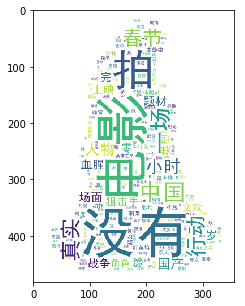

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

backgroud_Image=plt.imread('alice.jpg') 
wordcloud=WordCloud(font_path="SimHei.ttf",background_color="white",mask=backgroud_Image,max_font_size=100) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)
 
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)